We first start the data acquisition process with importing the relevant python libraries.

In [56]:
# 
# These are standard python modules
import json, time, urllib.parse
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

# The 'requests' module is not a standard Python module. You will need to install this with pip/pip3 if you do not already have it
import requests

The next step includes declaring the required parameters. ARTICLE_TITLES contains the list of dinosaur that we are interested in finding.


In [4]:
#########
#
#    CONSTANTS
#

# The REST API 'pageviews' URL - this is the common URL/endpoint for all 'pageviews' API requests
API_REQUEST_PAGEVIEWS_ENDPOINT = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/'

# This is a parameterized string that specifies what kind of pageviews request we are going to make
# In this case it will be a 'per-article' based request. The string is a format string so that we can
# replace each parameter with an appropriate value before making the request
API_REQUEST_PER_ARTICLE_PARAMS = 'per-article/{project}/{access}/{agent}/{article}/{granularity}/{start}/{end}'

# The Pageviews API asks that we not exceed 100 requests per second, we add a small delay to each request
API_LATENCY_ASSUMED = 0.002       # Assuming roughly 2ms latency on the API and network
API_THROTTLE_WAIT = (1.0/100.0)-API_LATENCY_ASSUMED

# When making a request to the Wikimedia API they ask that you include a "unique ID" that will allow them to
# contact you if something happens - such as - your code exceeding request limits - or some other error happens
REQUEST_HEADERS = {
    'User-Agent': 'kirstng@uw.edu, University of Washington, MSDS DATA 512 - AUTUMN 2022',
}

# This is just a list of English Wikipedia article titles that we can use for example requests
ARTICLE_TITLES = ['"Coelosaurus" antiquus',
'Aachenosaurus',
'Aardonyx',
'Abdarainurus',
'Abditosaurus',
'Abelisaurus',
'Abrictosaurus',
'Abrosaurus',
'Abydosaurus',
'Acantholipan',
'Acanthopholis',
'Achelousaurus',
'Acheroraptor',
'Achillesaurus',
'Achillobator',
'Acristavus',
'Acrocanthosaurus',
'Acrotholus',
'Actiosaurus',
'Adamantisaurus',
'Adasaurus',
'Adelolophus',
'Adeopapposaurus',
'Adratiklit',
'Adynomosaurus',
'Aegyptosaurus',
'Aeolosaurus',
'Aepisaurus',
'Aepyornithomimus',
'Aerosteon',
'Afromimus',
'Afrovenator',
'Agathaumas',
'Aggiosaurus',
'Agilisaurus',
'Agnosphitys',
'Agrosaurus',
'Agujaceratops',
'Agustinia',
'Ahshislepelta',
'Ajkaceratops',
'Ajnabia',
'Akainacephalus',
'Alamosaurus',
'Alaskacephale',
'Albalophosaurus',
'Albertaceratops',
'Albertadromeus',
'Albertavenator',
'Albertonykus',
'Albertosaurus',
'Albinykus',
'Albisaurus',
'Alcovasaurus',
'Alectrosaurus',
'Aletopelta',
'Algoasaurus',
'Alioramus',
'Allosaurus',
'Almas ukhaa',
'Alnashetri',
'Alocodon',
'Altirhinus',
'Altispinax',
'Alvarezsaurus',
'Alwalkeria',
'Alxasaurus',
'Amanzia',
'Amargasaurus',
'Amargatitanis',
'Amazonsaurus',
'Ambopteryx',
'Ampelosaurus',
'Amphicoelias',
'Amtocephale',
'Amtosaurus',
'Amurosaurus',
'Amygdalodon',
'Anabisetia',
'Analong',
'Anasazisaurus',
'Anchiceratops',
'Anchiornis',
'Anchisaurus',
'Andesaurus',
'Angolatitan',
'Angulomastacator',
'Anhuilong',
'Aniksosaurus',
'Animantarx',
'Ankistrodon',
'Ankylosauria',
'Ankylosaurus',
'Anodontosaurus',
'Anomalipes',
'Anoplosaurus',
'Anserimimus',
'Antarctopelta',
'Antarctosaurus',
'Antetonitrus',
'Antrodemus',
'Anzu wyliei',
'Aoniraptor',
'Aorun',
'Apatodon',
'Apatoraptor',
'Apatosaurus',
'Appalachiosaurus',
'Aquilarhinus',
'Aquilops',
'Arackar',
'Aragosaurus',
'Aralosaurus',
'Aratasaurus',
'Archaeoceratops',
'Archaeodontosaurus',
'Archaeopteryx',
'Archaeoraptor',
'Archaeornithoides',
'Archaeornithomimus',
'Archosaur',
'Arcovenator',
'Arctosaurus',
'Arcusaurus',
'Arenysaurus',
'Argentinosaurus',
'Argyrosaurus',
'Aristosuchus',
'Arizonasaurus',
'Arkansaurus',
'Arkharavia',
'Arrhinoceratops',
'Arrudatitan',
'Arstanosaurus',
'Asfaltovenator',
'Asiaceratops',
'Asiamericana',
'Asiatosaurus',
'Asilisaurus',
'Astrodon',
'Astrophocaudia',
'Asylosaurus',
'Atacamatitan',
'Atlantosaurus',
'Atlasaurus',
'Atlascopcosaurus',
'Atrociraptor',
'Atsinganosaurus',
'Aublysodon',
'Aucasaurus',
'Augustynolophus',
'Auroraceratops',
'Aurornis',
'Australodocus',
'Australotitan',
'Australovenator',
'Austrocheirus',
'Austroposeidon',
'Austroraptor',
'Austrosaurus',
'Avaceratops',
'Avalonianus',
'Avebrevicauda',
'Avemetatarsalia',
'Aviatyrannis',
'Avimimus',
'Avipes',
'Avisaurus',
'Azendohsaurus',
'Azhdarchoidea',
'Baalsaurus',
'Bactrosaurus',
'Bagaceratops',
'Bagaraatan',
'Bagualia',
'Bagualosaurus',
'Bahariasaurus',
'Bainoceratops',
'Bajadasaurus',
'Balaur bondoc',
'Bambiraptor',
'Banji',
'Bannykus',
'Baotianmansaurus',
'Barapasaurus',
'Barilium',
'Barosaurus',
'Barrosasaurus',
'Barsboldia',
'Baryonyx',
'Bashanosaurus',
'Basutodon',
'Batyrosaurus',
'Baurutitan',
'Bayannurosaurus',
'Beg tse',
'Beibeilong',
'Beipiaognathus',
'Beipiaosaurus',
'Beishanlong',
'Bellusaurus',
'Belodon',
'Berberosaurus',
'Berthasaura',
'Betasuchus',
'Bicentenaria',
'Bienosaurus',
'Bissektipelta',
'Bistahieversor',
'Bisticeratops',
'Blasisaurus',
'Blikanasaurus',
'Bolong',
'Bonapartenykus',
'Bonapartesaurus',
'Bonatitan',
'Bonitasaura',
'Borealopelta',
'Borealosaurus',
'Boreonykus',
'Borogovia',
'Bothriospondylus',
'Brachiosaurus',
'Brachyceratops',
'Brachylophosaurus',
'Brachypodosaurus',
'Brachytrachelopan',
'Bradycneme',
'Brasileosaurus',
'Brasilotitan',
'Bravasaurus',
'Bravoceratops',
'Breviceratops',
'Brighstoneus',
'Brithopus',
'Brohisaurus',
'Brontomerus',
'Brontosaurus',
'Bruhathkayosaurus',
'Buitreraptor',
'Burianosaurus',
'Buriolestes',
'Byronosaurus',
'Caenagnathasia',
'Caenagnathus',
'Caihong',
'Calamosaurus',
'Calamospondylus',
'Callovosaurus',
'Camarasaurus',
'Camarillasaurus',
'Camelotia',
'Camposaurus',
'Camptosaurus',
'Campylodoniscus',
'Canardia',
'Carcharodontosaurus',
'Cardiodon',
'Carnotaurus',
'Caseosaurus',
'Cathartesaura',
'Caudipteryx',
'Cedarosaurus',
'Cedarpelta',
'Cedrorestes',
'Centemodon',
'Centrosaurus',
'Cerasinops',
'Ceratonykus',
'Ceratops',
'Ceratosaurus',
'Ceratosuchops',
'Cetiosauriscus',
'Cetiosaurus',
'Changchunsaurus',
'Changmiania',
'Changyuraptor',
'Chaoyangsaurus',
'Charonosaurus',
'Chasmosaurus',
'Chebsaurus',
'Chenanisaurus',
'Chialingosaurus',
'Chiayusaurus',
'Chienkosaurus',
'Chilantaisaurus',
'Chilesaurus',
'Chindesaurus',
'Chingkankousaurus',
'Chinshakiangosaurus',
'Chirostenotes',
'Choconsaurus',
'Chondrosteosaurus',
'Choyrodon',
'Chromogisaurus',
'Chuandongocoelurus',
'Chuanjiesaurus',
'Chuanqilong',
'Chubutisaurus',
'Chungkingosaurus',
'Chuxiongosaurus',
'Cionodon',
'Citipati',
'Citipes',
'Claorhynchus',
'Claosaurus',
'Clasmodosaurus',
'Clepsysaurus',
'Coahuilaceratops',
'Coelophysis',
'Coeluroides',
'Coelurosauravus',
'Coelurus',
'Colepiocephale',
'Coloradisaurus',
'Comahuesaurus',
'Compsognathus',
'Compsosuchus',
'Concavenator',
'Conchoraptor',
'Condorraptor',
'Convolosaurus',
'Coronosaurus',
'Corythoraptor',
'Corythosaurus',
'Craspedodon',
'Craterosaurus',
'Crichtonpelta',
'Crichtonsaurus',
'Cristatusaurus',
'Crittendenceratops',
'Crocodilia',
'Crosbysaurus',
'Crurotarsi',
'Cruxicheiros',
'Cryolophosaurus',
'Cryptosaurus',
'Cumnoria',
'Daanosaurus',
'Dacentrurus',
'Daemonosaurus',
'Dahalokely',
'Dakosaurus',
'Dakotadon',
'Dakotaraptor',
'Daliansaurus',
'Dandakosaurus',
'Dashanpusaurus',
'Daspletosaurus',
'Dasygnathoides',
'Datanglong',
'Datonglong',
'Datousaurus',
'Daxiatitan',
'Deinocheirus',
'Deinodon',
'Deinonychus',
'Deltadromeus',
'Demandasaurus',
'Denversaurus',
'Deuterosaurus',
'Diabloceratops',
'Diamantinasaurus',
'Dianchungosaurus',
'Diapsid',
'Diclonius',
'Dicraeosaurus',
'Dilong paradoxus',
'Dilophosaurus',
'Diluvicursor',
'Dimetrodon',
'Dineobellator',
'Dinheirosaurus',
'Dinodocus',
'Diplodocus',
'Diplotomodon',
'Dolichosuchus',
'Dongbeititan',
'Dongyangopelta',
'Dongyangosaurus',
'Doratodon',
'Draconyx',
'Dracopelta',
'Dracoraptor',
'Dracovenator',
'Dravidosaurus',
'Dreadnoughtus',
'Dromaeosauroides',
'Dromaeosaurus',
'Dromiceiomimus',
'Drusilasaura',
'Dryosaurus',
'Dryptosauroides',
'Dryptosaurus',
'Dubreuillosaurus',
'Duriatitan',
'Duriavenator',
'Dynamoterror',
'Dyoplosaurus',
'Dysalotosaurus',
'Dysganus',
'Dyslocosaurus',
'Dystrophaeus',
'Dzharaonyx',
'Dzharatitanis',
'Echinodon',
'Edmontonia',
'Edmontosaurus',
'Efraasia',
'Einiosaurus',
'Ekrixinatosaurus',
'Elachistosuchus',
'Elaltitan',
'Elaphrosaurus',
'Elemgasem',
'Elmisaurus',
'Elopteryx',
'Elrhazosaurus',
'Emausaurus',
'Embasaurus',
'Enigmosaurus',
'Eoabelisaurus',
'Eocarcharia',
'Eocursor',
'Eodromaeus',
'Eolambia',
'Eomamenchisaurus',
'Eoraptor',
'Eosinopteryx',
'Eotrachodon',
'Eotriceratops',
'Eotyrannus',
'Eousdryosaurus',
'Epachthosaurus',
'Epanterias',
'Epichirostenotes',
'Epidexipteryx',
'Equijubus',
'Erectopus',
'Erketu',
'Erliansaurus',
'Erlikosaurus',
'Erythrovenator',
'Eshanosaurus',
'Eucamerotus',
'Eucercosaurus',
'Eucnemesaurus',
'Eucoelophysis',
'Euhelopus',
'Euoplocephalus',
'Eurolimnornis',
'Euronychodon',
'Europasaurus',
'Europatitan',
'Europelta',
'Euskelosaurus',
'Eustreptospondylus',
'Fabrosaurus',
'Falcarius',
'Ferganasaurus',
'Ferganocephale',
'Ferrisaurus',
'Foraminacephale',
'Fosterovenator',
'Fostoria dhimbangunmal',
'Fruitadens',
'Fukuiraptor',
'Fukuisaurus',
'Fukuititan',
'Fukuivenator',
'Fulengia',
'Fulgurotherium',
'Fushanosaurus',
'Fusuisaurus',
'Futabasaurus',
'Futalognkosaurus',
'Fylax',
'Galeamopus',
'Galesaurus',
'Galleonosaurus',
'Gallimimus',
'Galvesaurus',
'Gannansaurus',
'Ganzhousaurus',
'Gargoyleosaurus',
'Garrigatitan',
'Garudimimus',
'Gasosaurus',
'Gasparinisaura',
'Gastonia (dinosaur)',
'Geminiraptor',
'Genusaurus',
'Genyodectes',
'Geosaurus',
'Geranosaurus',
'Gideonmantellia',
'Giganotosaurus',
'Gigantoraptor',
'Gigantosaurus',
'Gigantoscelus',
'Gigantspinosaurus',
'Gilmoreosaurus',
'Giraffatitan',
'Glacialisaurus',
'Glishades',
'Glyptodontopelta',
'Gnathovorax',
'Gobihadros',
'Gobiraptor',
'Gobisaurus',
'Gobititan',
'Gobivenator',
'Gojirasaurus',
'Gondwanatitan',
'Gongbusaurus',
'Gongpoquansaurus',
'Gongxianosaurus',
'Gorgosaurus',
'Goyocephale',
'Graciliceratops',
'Graciliraptor',
'Gracilisuchus',
'Gravitholus',
'Gresslyosaurus',
'Gryphoceratops',
'Gryponyx',
'Gryposaurus',
'Guaibasaurus',
'Gualicho',
'Guanlong',
'Guemesia',
'Gwyneddosaurus',
'Gyposaurus',
'Hadrosaurus',
'Haestasaurus',
'Hagryphus',
'Hallopus',
'Halszkaraptor',
'Halticosaurus',
'Hamititan',
'Hanssuesia',
'Haplocanthosaurus',
'Haplocheirus',
'Harpymimus',
'Haya griva',
'Heishansaurus',
'Helioceratops',
'Heptasteornis',
'Herbstosaurus',
'Herrerasaurus',
'Hesperonychus',
'Hesperornithoides',
'Hesperosaurus',
'Heterodontosaurus',
'Hexing',
'Hexinlusaurus',
'Heyuannia',
'Hierosaurus',
'Hippodraco',
'Histriasaurus',
'Homalocephale',
'Honghesaurus',
'Hoplitosaurus',
'Horshamosaurus',
'Hortalotarsus',
'Huabeisaurus',
'Hualianceratops',
'Huallasaurus',
'Huanansaurus',
'Huanghetitan',
'Huangshanlong',
'Huaxiagnathus',
'Huayangosaurus',
'Hudiesaurus',
'Huehuecanauhtlus',
'Huinculsaurus',
'Hulsanpes',
'Hungarosaurus',
'Hylaeosaurus',
'Hypacrosaurus',
'Hyperodapedon',
'Hypselorhachis',
'Hypselosaurus',
'Hypselospinus',
'Hypsibema',
'Hypsibema missouriensis',
'Hypsilophodon',
'Hypsirhophus',
'Iberospinus',
'Ichthyosaur',
'Ichthyovenator',
'Ignavusaurus',
'Ignotosaurus',
'Iguanacolossus',
'Iguanodon',
'Iliosuchus',
'Ilokelesia',
'Imperobator',
'Incisivosaurus',
'Indosaurus',
'Indosuchus',
'Ingentia',
'Inosaurus',
'Invictarx',
'Irisosaurus',
'Irritator',
'Isaberrysaura',
'Isanosaurus',
'Isasicursor',
'Ischioceratops',
'Isisaurus',
'Issi',
'Itapeuasaurus',
'Itemirus',
'Iuticosaurus',
'Iyuku',
'Jainosaurus',
'Jakapil',
'Jaklapallisaurus',
'Janenschia',
'Jaxartosaurus',
'Jeholosaurus',
'Jeyawati',
'Jianchangosaurus',
'Jiangjunosaurus',
'Jiangshanosaurus',
'Jiangxisaurus',
'Jianianhualong',
'Jinbeisaurus',
'Jinfengopteryx',
'Jingshanosaurus',
'Jintasaurus',
'Jinyunpelta',
'Jinzhousaurus',
'Jiutaisaurus',
'Jobaria',
'Jubbulpuria',
'Judiceratops',
'Juratyrant',
'Juravenator',
'Kaatedocus',
'Kaijiangosaurus',
'Kaijutitan',
'Kakuru',
'Kamuysaurus',
'Kangnasaurus',
'Kansaignathus',
'Karongasaurus',
'Katepensaurus',
'Kayentavenator',
'Kazaklambia',
'Kelmayisaurus',
'Kelumapusaura',
'Kemkemia',
'Kentrosaurus',
'Kerberosaurus',
'Khaan',
'Kholumolumo',
'Khulsanurus',
'Kileskus',
'Kinnareemimus',
'Klamelisaurus',
'Kol ghuva',
'Koparion',
'Koreaceratops',
'Koreanosaurus',
'Koshisaurus',
'Kosmoceratops',
'Kotasaurus',
'Koutalisaurus',
'Kritosaurus',
'Kryptops',
'Krzyzanowskisaurus',
'Kulceratops',
'Kulindadromeus',
'Kunbarrasaurus',
'Kundurosaurus',
'Kuru kulla',
'Kurupi itaata',
'Kuszholia',
'Kwanasaurus',
'Labocania',
'Laevisuchus',
'Lagerpeton',
'Lagosuchus',
'Laiyangosaurus',
'Lajasvenator',
'Lambeosaurus',
'Lametasaurus',
'Lamplughsaura',
'Lanzhousaurus',
'Laosaurus',
'Lapampasaurus',
'Laplatasaurus',
'Lapparentosaurus',
'Laquintasaura',
'Lariosaurus',
'Latenivenatrix',
'Latirhinus',
'Lavocatisaurus',
'Leaellynasaura',
'Ledumahadi',
'Leinkupal',
'Leonerasaurus',
'Lepidus praecisio',
'Leptoceratops',
'Leshansaurus',
'Lesothosaurus',
'Lessemsaurus',
'Levnesovia',
'Lewisuchus',
'Lexovisaurus',
'Leyesaurus',
'Liaoceratops',
'Liaoningosaurus',
'Liaoningotitan',
'Liaoningvenator',
'Libycosaurus',
'Ligabueino',
'Ligabuesaurus',
'Liliensternus',
'Limaysaurus',
'Limusaurus',
'Lingwulong',
'Lingyuanosaurus',
'Linhenykus',
'Linheraptor',
'Linhevenator',
'Lirainosaurus',
'Lisboasaurus',
'Liubangosaurus',
'Llukalkan',
'Lohuecotitan',
'Loncosaurus',
'Longisquama',
'Lophorhothon',
'Lophostropheus',
'Lophotrochozoa',
'Loricatosaurus',
'Loricosaurus',
'Losillasaurus',
'Lourinhanosaurus',
'Lourinhasaurus',
'Luanchuanraptor',
'Lucianosaurus',
'Lucianovenator',
'Lufengosaurus',
'Lukousaurus',
'Luoyanggia',
'Lurdusaurus',
'Lusitanosaurus',
'Lusotitan',
'Lusovenator',
'Lutungutali',
'Lycorhinus',
'Lythronax',
'Macelognathus',
'Machairasaurus',
'Machairoceratops',
'Machimosaurus',
'Macrocollum',
'Macrodontophion',
'Macrogryphosaurus',
'Macrurosaurus',
'Magnamanus',
'Magnapaulia',
'Magnosaurus',
'Magyarosaurus',
'Mahakala omnogovae',
'Mahuidacursor',
'Maiasaura',
'Maip',
'Majungasaurus',
'Malarguesaurus',
'Malawisaurus',
'Maleevus',
'Mamenchisaurus',
'Mandschurosaurus',
'Manidens',
'Mansourasaurus',
'Mantellisaurus',
'Mapusaurus',
'Maraapunisaurus',
'Marasuchus',
'Marmarospondylus',
'Marshosaurus',
'Martharaptor',
'Masiakasaurus',
'Massospondylus',
'Matheronodon',
'Maxakalisaurus',
'Mbiresaurus',
'Medusaceratops',
'Megalosaurus',
'Megapnosaurus',
'Megaraptor',
'Melanorosaurus',
'Mendozasaurus',
'Menefeeceratops',
'Menucocelsior',
'Mercuriceratops',
'Meroktenos',
'Metriacanthosaurus',
'Microceratus',
'Microcoelus',
'Microhadrosaurus',
'Micropachycephalosaurus',
'Microraptor',
'Microvenator',
'Mierasaurus',
'Minmi paravertebra',
'Minotaurasaurus',
'Miragaia longicollum',
'Mirischia',
'Mnyamawamtuka',
'Moabosaurus',
'Mochlodon',
'Mongolosaurus',
'Mongolostegus',
'Monkonosaurus',
'Monoclonius',
'Monolophosaurus',
'Mononykus',
'Montanoceratops',
'Morelladon',
'Morinosaurus',
'Moros intrepidus',
'Morrosaurus',
'Mosaiceratops',
'Mosasaur',
'Murusraptor',
'Mussaurus',
'Muttaburrasaurus',
'Muyelensaurus',
'Mymoorapelta',
'Naashoibitosaurus',
'Nambalia',
'Nankangia',
'Nanningosaurus',
'Nanosaurus',
'Nanshiungosaurus',
'Nanuqsaurus',
'Nanyangosaurus',
'Napaisaurus',
'Narambuenatitan',
'Narindasaurus',
'Nasutoceratops',
'Navajoceratops',
'Nebulasaurus',
'Nedcolbertia',
'Nedoceratops',
'Neimongosaurus',
'Nemegtomaia',
'Nemegtonykus',
'Nemegtosaurus',
'Neosodon',
'Neovenator',
'Neuquenraptor',
'Neuquensaurus',
'Ngwevu',
'Nhandumirim',
'Niebla antiqua',
'Nigersaurus',
'Ningyuansaurus',
'Ninjatitan',
'Niobrarasaurus',
'Nipponosaurus',
'Noasaurus',
'Nodocephalosaurus',
'Nodosaurus',
'Nomingia',
'Nopcsaspondylus',
'Normanniasaurus',
'Notatesseraeraptor',
'Nothosaur',
'Nothronychus',
'Notoceratops',
'Notocolossus',
'Notohypsilophodon',
'Nqwebasaurus',
'Nullotitan',
'Nuthetes',
'Nyasasaurus',
'Oceanotitan',
'Ohmdenosaurus',
'Ojoceratops',
'Ojoraptorsaurus',
'Oksoko avarsan',
'Oligosaurus',
'Olorotitan',
'Omeisaurus',
'Ondogurvel',
'Oohkotokia',
'Opisthocoelicaudia',
'Oplosaurus',
'Orkoraptor',
'Ornatops',
'Ornithodesmus',
'Ornitholestes',
'Ornithomerus',
'Ornithomimoides',
'Ornithomimus',
'Ornithopsis',
'Ornithosuchus',
'Orodromeus',
'Orosaurus',
'Orthogoniosaurus',
'Orthomerus',
'Oryctodromeus',
'Osmakasaurus',
'Ostafrikasaurus',
'Ostromia',
'Ouranosaurus',
'Overoraptor',
'Overosaurus',
'Oviraptor',
'Owenodon',
'Oxalaia',
'Ozraptor',
'Pachycephalosaurus',
'Pachyrhinosaurus',
'Pachysuchus',
'Padillasaurus',
'Palaeoctonus',
'Palaeocursornis',
'Palaeopteryx',
'Palaeosaurus',
'Palaeoscincus',
'Paludititan',
'Pampadromaeus',
'Pamparaptor',
'Panamericansaurus',
'Pandoravenator',
'Panguraptor',
'Panoplosaurus',
'Panphagia',
'Pantydraco',
'Papiliovenator',
'Paralitherizinosaurus',
'Paralititan',
'Paranthodon',
'Pararhabdodon',
'Parasaurolophus',
'Paraxenisaurus',
'Pareiasaur',
'Pareiasaurus',
'Pareisactus',
'Parksosaurus',
'Paronychodon',
'Parvicursor',
'Patagonykus',
'Patagosaurus',
'Patagotitan',
'Pawpawsaurus',
'Pectinodon',
'Pedopenna',
'Pegomastax',
'Peishansaurus',
'Pelecanimimus',
'Pellegrinisaurus',
'Peloroplites',
'Pelorosaurus',
'Pelycosaur',
'Pendraig',
'Penelopognathus',
'Pentaceratops',
'Perijasaurus',
'Petrobrasaurus',
'Phaedrolosaurus',
'Philovenator',
'Phuwiangosaurus',
'Phuwiangvenator',
'Phyllodon',
'Phytosaur',
'Piatnitzkysaurus',
'Picrodon',
'Pilmatueia',
'Pinacosaurus',
'Pisanosaurus',
'Pitekunsaurus',
'Piveteausaurus',
'Planicoxa',
'Plateosauravus',
'Plateosaurus',
'Platypelta',
'Plesiohadros',
'Plesiosaur',
'Pneumatoarthrus',
'Pneumatoraptor',
'Podokesaurus',
'Poekilopleuron',
'Polacanthoides',
'Polacanthus',
'Polyodontosaurus',
'Polyonax',
'Ponerosteus',
'Poposaurus',
'Portellsaurus',
'Postosuchus',
'Powellvenator',
'Pradhania',
'Prenocephale',
'Prenoceratops',
'Priconodon',
'Priodontognathus',
'Proa valdearinnoensis',
'Probactrosaurus',
'Probrachylophosaurus',
'Proceratosaurus',
'Procompsognathus',
'Prodeinodon',
'Propanoplosaurus',
'Prosaurolophus',
'Protarchaeopteryx',
'Protecovasaurus',
'Protoavis',
'Protoceratops',
'Protognathosaurus',
'Protohadros',
'Protorosauria',
'Protorosaurus',
'Pseudosuchia',
'Psittacosaurus',
'Pteropelyx',
'Pterosaur',
'Pterospondylus',
'Puertasaurus',
'Pukyongosaurus',
'Pulanesaura',
'Punatitan',
'Pycnonemosaurus',
'Pyroraptor',
'Qantassaurus',
'Qianzhousaurus',
'Qiaowanlong',
'Qijianglong',
'Qingxiusaurus',
'Qinlingosaurus',
'Qiupalong',
'Qiupanykus',
'Quaesitosaurus',
'Quetecsaurus',
'Quilmesaurus',
'Rachitrema',
'Rahiolisaurus',
'Rahonavis',
'Rajasaurus',
'Rapator',
'Rapetosaurus',
'Raptorex',
'Ratchasimasaurus',
'Rativates',
'Rauisuchia',
'Rayososaurus',
'Razanandrongobe',
'Rebbachisaurus',
'Regaliceratops',
'Regnosaurus',
'Revueltosaurus',
'Rhabdodon',
'Rhadinosaurus',
'Rhinorex',
'Rhoetosaurus',
'Rhomaleopakhus',
'Rhopalodon',
'Rhynchosaur',
'Riabininohadros',
'Richardoestesia',
'Rileyasuchus',
'Rinchenia',
'Rinconsaurus',
'Riojasaurus',
'Riojasuchus',
'Riparovenator',
'Rocasaurus',
'Ruehleia',
'Rugocaudia',
'Rugops',
'Rukwatitan',
'Ruyangosaurus',
'Sacisaurus',
'Sahaliyania',
'Saichania',
'Saltasaurus',
'Saltopus',
'Saltriovenator',
'Sanjuansaurus',
'Sanpasaurus',
'Santanaraptor',
'Sanxiasaurus',
'Sarahsaurus',
'Sarcolestes',
'Sarcosaurus',
'Sarmientosaurus',
'Saurolophus',
'Sauroniops',
'Sauropelta',
'Saurophaganax',
'Sauroplites',
'Sauroposeidon',
'Saurornithoides',
'Saurornitholestes',
'Savannasaurus',
'Scansoriopteryx',
'Scelidosaurus',
'Schleitheimia',
'Scipionyx',
'Sciurumimus',
'Scleromochlus',
'Scolosaurus',
'Scutellosaurus',
'Secernosaurus',
'Sefapanosaurus',
'Segisaurus',
'Segnosaurus',
'Seitaad',
'Sektensaurus',
'Serendipaceratops',
'Serikornis',
'Shamosaurus',
'Shanag',
'Shantungosaurus',
'Shanxia',
'Shanyangosaurus',
'Shaochilong',
'Shenzhousaurus',
'Shidaisaurus',
'Shingopana',
'Shishugounykus',
'Shixinggia',
'Shri devi',
'Shuangbaisaurus',
'Shuangmiaosaurus',
'Shunosaurus',
'Shuvosaurus',
'Shuvuuia',
'Siamodon',
'Siamosaurus',
'Siamotyrannus',
'Siamraptor',
'Sibirotitan',
'Sierraceratops',
'Sigilmassasaurus',
'Silesaurus',
'Siluosaurus',
'Silutitan',
'Silvisaurus',
'Similicaudipteryx',
'Sinankylosaurus',
'Sinocalliopteryx',
'Sinocephale',
'Sinoceratops',
'Sinocoelurus',
'Sinopliosaurus',
'Sinornithoides',
'Sinornithomimus',
'Sinornithosaurus',
'Sinosauropteryx',
'Sinosaurus',
'Sinotyrannus',
'Sinovenator',
'Sinraptor',
'Sinusonasus',
'Sirindhorna',
'Skorpiovenator',
'Smitanosaurus',
'Sonidosaurus',
'Sonorasaurus',
'Soriatitan',
'Soumyasaurus',
'Spectrovenator',
'Sphaerotholus',
'Sphenosaurus',
'Sphenosuchia',
'Sphenosuchus',
'Spiclypeus',
'Spicomellus',
'Spinophorosaurus',
'Spinops',
'Spinosaurus',
'Spinostropheus',
'Spinosuchus',
'Spondylosoma',
'Squalodon',
'Staurikosaurus',
'Stegoceras',
'Stegopelta',
'Stegosaurides',
'Stegosaurus',
'Stegouros',
'Stellasaurus',
'Stenonychosaurus',
'Stenopelix',
'Stephanosaurus',
'Stokesosaurus',
'Streptospondylus',
'Struthiomimus',
'Struthiosaurus',
'Styracosaurus',
'Succinodon',
'Suchomimus',
'Suchoprion',
'Suchosaurus',
'Supersaurus',
'Suskityrannus',
'Suuwassea',
'Suzhousaurus',
'Syngonosaurus',
'Szechuanosaurus',
'Tachiraptor',
'Talarurus',
'Talenkauen',
'Tamarro',
'Tambatitanis',
'Tangvayosaurus',
'Tanius',
'Taniwhasaurus',
'Tanycolagreus',
'Tanystropheidae',
'Tanystropheus',
'Tanystrosuchus',
'Taohelong',
'Tapinocephalus',
'Tapuiasaurus',
'Tarascosaurus',
'Tarbosaurus',
'Tarchia',
'Tastavinsaurus',
'Tatankacephalus',
'Tatankaceratops',
'Tataouinea',
'Tatisaurus',
'Taurovenator',
'Taveirosaurus',
'Tazoudasaurus',
'Technosaurus',
'Tecovasaurus',
'Tehuelchesaurus',
'Teinurosaurus',
'Teleocrater',
'Telmatosaurus',
'Tendaguria',
'Tengrisaurus',
'Tenontosaurus',
'Teratophoneus',
'Teratosaurus',
'Termatosaurus',
'Terminocavus',
'Tethyshadros',
'Texacephale',
'Texasetes',
'Thanatotheristes',
'Thanos simonattoi',
'Thecocoelurus',
'Thecodontosaurus',
'Thecospondylus',
'Theiophytalia',
'Therapsid',
'Therizinosaurus',
'Theropoda',
'Thescelosaurus',
'Thespesius',
'Tianchisaurus',
'Tianyulong',
'Tianyuraptor',
'Tianzhenosaurus',
'Tichosteus',
'Tienshanosaurus',
'Timimus',
'Timurlengia',
'Titanoceratops',
'Titanosaurus',
'Tlatolophus',
'Tochisaurus',
'Tonganosaurus',
'Tongtianlong',
'Tornieria',
'Torosaurus',
'Torvosaurus',
'Tototlmimus',
'Trachodon',
'Tralkasaurus',
'Tratayenia',
'Traukutitan',
'Trialestes',
'Triceratops',
'Trierarchuncus',
'Trigonosaurus',
'Trimucrodon',
'Trinisaura',
'Triunfosaurus',
'Troodon',
'Tsaagan',
'Tsagantegia',
'Tsintaosaurus',
'Tuebingosaurus',
'Tugulusaurus',
'Tuojiangosaurus',
'Turanoceratops',
'Turiasaurus',
'Tylocephale',
'Tyrannosaurus',
'Tyrannotitan',
'Uberabatitan',
'Ubirajara jubatus',
'Udanoceratops',
'Ultrasaurus',
'Ulughbegsaurus',
'Unaysaurus',
'Unenlagia',
'Unescoceratops',
'Unquillosaurus',
'Urbacodon',
'Utahceratops',
'Utahraptor',
'Uteodon',
'Vagaceratops',
'Vahiny',
'Valdoraptor',
'Valdosaurus',
'Vallibonavenatrix',
'Variraptor',
'Vayuraptor',
'Vectaerovenator',
'Vectiraptor',
'Velafrons',
'Velocipes',
'Velociraptor',
'Velocisaurus',
'Venaticosuchus',
'Venenosaurus',
'Vespersaurus',
'Veterupristisaurus',
'Viavenator',
'Volgatitan',
'Volkheimeria',
'Vouivria',
'Vulcanodon',
'Wakinosaurus',
'Walgettosuchus',
'Wamweracaudia',
'Wannanosaurus',
'Weewarrasaurus',
'Wellnhoferia',
'Wendiceratops',
'Wiehenvenator',
'Willinakaqe',
'Wintonotitan',
'Wuerhosaurus',
'Wulagasaurus',
'Wulatelong',
'Wulong bohaiensis',
'Wyleyia',
'Xenoceratops',
'Xenoposeidon',
'Xenotarsosaurus',
'Xianshanosaurus',
'Xiaosaurus',
'Xiaotingia',
'Xingtianosaurus',
'Xingxiulong',
'Xinjiangovenator',
'Xinjiangtitan',
'Xiongguanlong',
'Xixianykus',
'Xixiasaurus',
'Xixiposaurus',
'Xiyunykus',
'Xuanhanosaurus',
'Xuanhuaceratops',
'Xunmenglong',
'Xuwulong',
'Yamaceratops',
'Yamanasaurus',
'Yamatosaurus',
'Yandusaurus',
'Yangchuanosaurus',
'Yanornis',
'Yaverlandia',
'Yehuecauhceratops',
'Yi (dinosaur)',
'Yimenosaurus',
'Yingshanosaurus',
'Yinlong',
'Yixianosaurus',
'Yizhousaurus',
'Yongjinglong',
'Ypupiara',
'Yuanmousaurus',
'Yueosaurus',
'Yulong mini',
'Yunganglong',
'Yunmenglong',
'Yunnanosaurus',
'Yunyangosaurus',
'Yurgovuchia',
'Yutyrannus',
'Yuxisaurus',
'Zalmoxes',
'Zanclodon',
'Zapalasaurus',
'Zapsalis',
'Zaraapelta',
'Zatomus',
'Zby',
'Zephyrosaurus',
'Zhanghenglong',
'Zhejiangosaurus',
'Zhenyuanlong',
'Zhongjianosaurus',
'Zhongornis',
'Zhongyuansaurus',
'Zhuchengceratops',
'Zhuchengtitan',
'Zhuchengtyrannus',
'Ziapelta',
'Zigongosaurus',
'Zizhongosaurus',
'Zuniceratops',
'Zuolong',
'Zuoyunlong',
'Zupaysaurus',
'Zuul',
]

# This template is used to map parameter values into the API_REQUST_PER_ARTICLE_PARAMS portion of an API request. The dictionary has a
# field/key for each of the required parameters. In the example, below, we only vary the article name, so the majority of the fields
# can stay constant for each request. Of course, these values *could* be changed if necessary.
ARTICLE_PAGEVIEWS_PARAMS_MOBILE_APP = {
    "project":     "en.wikipedia.org",
    "access":      "mobile-app",      # this should be changed for the different access types
    "agent":       "user",
    "article":     "",             
    "granularity": "monthly",
    "start":       "2015070100",
    "end":         "2022090100"    
}

ARTICLE_PAGEVIEWS_PARAMS_MOBILE_WEB = {
    "project":     "en.wikipedia.org",
    "access":      "mobile-web",      # this should be changed for the different access types
    "agent":       "user",
    "article":     "",             
    "granularity": "monthly",
    "start":       "2015070100",
    "end":         "2022090100"    
}

ARTICLE_PAGEVIEWS_PARAMS_DESKTOP = {
    "project":     "en.wikipedia.org",
    "access":      "desktop",      
    "agent":       "user",
    "article":     "",             
    "granularity": "monthly",
    "start":       "2015070100",
    "end":         "2022090100"    
}

ARTICLE_PAGEVIEWS_PARAMS_CUMULATIVE = {
    "project":     "en.wikipedia.org",
    "access":      "all-access",      
    "agent":       "user",
    "article":     "",             
    "granularity": "monthly",
    "start":       "2015070100",
    "end":         "2022090100"    
}

The API request will be made using one procedure. The idea is to make this reusable. The procedure is parameterized, but relies on the constants above for the important parameters. The underlying assumption is that this will be used to request data for a set of article pages. Therefore the parameter most likely to change is the article_title.

In [7]:
#########
#
#    PROCEDURES/FUNCTIONS
#

def request_pageviews_per_article(article_title = None, 
                                  endpoint_url = API_REQUEST_PAGEVIEWS_ENDPOINT, 
                                  endpoint_params = API_REQUEST_PER_ARTICLE_PARAMS, 
                                  request_template = ARTICLE_PAGEVIEWS_PARAMS_CUMULATIVE,
                                  headers = REQUEST_HEADERS):
    # Make sure we have an article title
    if not article_title: return None
    
    # Titles are supposed to have spaces replaced with "_" and be URL encoded
    article_title_encoded = urllib.parse.quote(article_title.replace(' ','_'))
    request_template['article'] = article_title_encoded
    
    # now, create a request URL by combining the endpoint_url with the parameters for the request
    request_url = endpoint_url+endpoint_params.format(**request_template)
    
    # make the request
    try:
        # we'll wait first, to make sure we don't exceed the limit in the situation where an exception
        # occurs during the request processing - throttling is always a good practice with a free
        # data source like Wikipedia - or other community sources
        if API_THROTTLE_WAIT > 0.0:
            time.sleep(API_THROTTLE_WAIT)
        response = requests.get(request_url, headers=headers)
        json_response = response.json()
    except Exception as e:
        print(e)
        json_response = None
    return json_response


The following helper function helps convert the json files downloaded from the API into python DataFrame. 
The downloaded json files will be stored in the file defined as the parameter path.

In [8]:
# Helper function to convert dictionary result from API to Dataframe data structure
def get_df(path:str, template:dict)-> pd.DataFrame:
    dall = []
    with open(path,'w', encoding='utf-8') as f:
        for n in ARTICLE_TITLES:
            views = request_pageviews_per_article(article_title = n,request_template = template)
            try:
                dall.extend(views['items'])
            except:
                
                continue
            json.dump(views, f, ensure_ascii=False, indent=4)
    #print(dall)
    return pd.DataFrame(n for n in dall)

This step is for requesting data for mobile web user.

In [9]:
mobile_web_df = get_df('/Users/kirsteenng/Desktop/UW/DATA 512/dino_monthly_mobile_web_201507_202209_2.json',
                        ARTICLE_PAGEVIEWS_PARAMS_MOBILE_WEB)   

mobile_web_df

,project,article,granularity,timestamp,access,agent,views
0,en.wikipedia,"""Coelosaurus""_antiquus",monthly,2021110100,mobile-web,user,5
1,en.wikipedia,"""Coelosaurus""_antiquus",monthly,2021120100,mobile-web,user,48
2,en.wikipedia,"""Coelosaurus""_antiquus",monthly,2022010100,mobile-web,user,44
3,en.wikipedia,"""Coelosaurus""_antiquus",monthly,2022020100,mobile-web,user,58
4,en.wikipedia,"""Coelosaurus""_antiquus",monthly,2022030100,mobile-web,user,49
...,...,...,...,...,...,...,...
111193,en.wikipedia,Zuul,monthly,2022040100,mobile-web,user,941
111194,en.wikipedia,Zuul,monthly,2022050100,mobile-web,user,939
111195,en.wikipedia,Zuul,monthly,2022060100,mobile-web,user,889
111196,en.wikipedia,Zuul,monthly,2022070100,mobile-web,user,1442


This step is for requesting data for mobile app user.

In [10]:
mobile_app_df = get_df('/Users/kirsteenng/Desktop/UW/DATA 512/dino_monthly_mobile_app_201507_202209.json',
                        ARTICLE_PAGEVIEWS_PARAMS_MOBILE_APP) 

mobile_app_df

,project,article,granularity,timestamp,access,agent,views
0,en.wikipedia,"""Coelosaurus""_antiquus",monthly,2021110100,mobile-app,user,0
1,en.wikipedia,"""Coelosaurus""_antiquus",monthly,2021120100,mobile-app,user,7
2,en.wikipedia,"""Coelosaurus""_antiquus",monthly,2022010100,mobile-app,user,7
3,en.wikipedia,"""Coelosaurus""_antiquus",monthly,2022020100,mobile-app,user,12
4,en.wikipedia,"""Coelosaurus""_antiquus",monthly,2022030100,mobile-app,user,5
...,...,...,...,...,...,...,...
111193,en.wikipedia,Zuul,monthly,2022040100,mobile-app,user,62
111194,en.wikipedia,Zuul,monthly,2022050100,mobile-app,user,66
111195,en.wikipedia,Zuul,monthly,2022060100,mobile-app,user,48
111196,en.wikipedia,Zuul,monthly,2022070100,mobile-app,user,84


This step is for requesting data for desktop user.

In [11]:
desktop_df = get_df('/Users/kirsteenng/Desktop/UW/DATA 512/dino_monthly_desktop_201507_202209.json',
                        ARTICLE_PAGEVIEWS_PARAMS_DESKTOP) 

desktop_df

,project,article,granularity,timestamp,access,agent,views
0,en.wikipedia,"""Coelosaurus""_antiquus",monthly,2021110100,desktop,user,48
1,en.wikipedia,"""Coelosaurus""_antiquus",monthly,2021120100,desktop,user,151
2,en.wikipedia,"""Coelosaurus""_antiquus",monthly,2022010100,desktop,user,186
3,en.wikipedia,"""Coelosaurus""_antiquus",monthly,2022020100,desktop,user,161
4,en.wikipedia,"""Coelosaurus""_antiquus",monthly,2022030100,desktop,user,165
...,...,...,...,...,...,...,...
111193,en.wikipedia,Zuul,monthly,2022040100,desktop,user,1055
111194,en.wikipedia,Zuul,monthly,2022050100,desktop,user,1091
111195,en.wikipedia,Zuul,monthly,2022060100,desktop,user,903
111196,en.wikipedia,Zuul,monthly,2022070100,desktop,user,1267


This step is for requesting data for both mobile and desktop user.

In [12]:
cum_df = get_df('/Users/kirsteenng/Desktop/UW/DATA 512/dino_monthly_cumulative_201507_202209.json',
                        ARTICLE_PAGEVIEWS_PARAMS_CUMULATIVE) 

cum_df

,project,article,granularity,timestamp,access,agent,views
0,en.wikipedia,"""Coelosaurus""_antiquus",monthly,2021110100,all-access,user,53
1,en.wikipedia,"""Coelosaurus""_antiquus",monthly,2021120100,all-access,user,206
2,en.wikipedia,"""Coelosaurus""_antiquus",monthly,2022010100,all-access,user,237
3,en.wikipedia,"""Coelosaurus""_antiquus",monthly,2022020100,all-access,user,231
4,en.wikipedia,"""Coelosaurus""_antiquus",monthly,2022030100,all-access,user,219
...,...,...,...,...,...,...,...
111193,en.wikipedia,Zuul,monthly,2022040100,all-access,user,2058
111194,en.wikipedia,Zuul,monthly,2022050100,all-access,user,2096
111195,en.wikipedia,Zuul,monthly,2022060100,all-access,user,1840
111196,en.wikipedia,Zuul,monthly,2022070100,all-access,user,2793


In [13]:
cum_df2 = cum_df
cum_df2['views'] = cum_df['views'].cumsum()
cum_df2.head()
# Export cumulative sum as json
cum_df2.to_json('/Users/kirsteenng/Desktop/UW/DATA 512/dino_monthly_cumulative_201507_202209.json',
                            orient = 'table')


A new dataframe mobile_combine_df contains the total number of mobile web and mobile app user. The dataframe is then exported as json file.


In [14]:
mobile_combine_df = mobile_web_df
mobile_combine_df.views = mobile_web_df.views + mobile_app_df.views
mobile_combine_df

,project,article,granularity,timestamp,access,agent,views
0,en.wikipedia,"""Coelosaurus""_antiquus",monthly,2021110100,mobile-web,user,5
1,en.wikipedia,"""Coelosaurus""_antiquus",monthly,2021120100,mobile-web,user,55
2,en.wikipedia,"""Coelosaurus""_antiquus",monthly,2022010100,mobile-web,user,51
3,en.wikipedia,"""Coelosaurus""_antiquus",monthly,2022020100,mobile-web,user,70
4,en.wikipedia,"""Coelosaurus""_antiquus",monthly,2022030100,mobile-web,user,54
...,...,...,...,...,...,...,...
111193,en.wikipedia,Zuul,monthly,2022040100,mobile-web,user,1003
111194,en.wikipedia,Zuul,monthly,2022050100,mobile-web,user,1005
111195,en.wikipedia,Zuul,monthly,2022060100,mobile-web,user,937
111196,en.wikipedia,Zuul,monthly,2022070100,mobile-web,user,1526


In [15]:
# Export combined file as json
mobile_combine_df.to_json('/Users/kirsteenng/Desktop/UW/DATA 512/dino_monthly_mobile_201507_202209.json',
                            orient = 'table')

### 2.1 Maximum Average and Minimum Average

The first graph should contain time series for the articles that have the highest average page requests and the lowest average page requests for desktop access and mobile access. Your graph should have four lines (max desktop, min desktop, max mobile, min mobile).

The first step is to aggregate the articles by views.

In [16]:
mobile_combine_df.groupby(['article'])['views'].agg('mean').sort_values()


article
Honghesaurus           5.732558
Suchoprion             6.337209
Protecovasaurus        6.988372
Palaeoctonus           8.616279
Gigantoscelus          9.290698
                       ...     
Stegosaurus        21125.116279
Triceratops        21224.744186
Spinosaurus        28995.127907
Velociraptor       42235.662791
Tyrannosaurus      59508.151163
Name: views, Length: 1421, dtype: float64

In [17]:
desktop_df.groupby(['article'])['views'].agg('mean').sort_values()

article
Honghesaurus        16.395349
Ornithomerus        20.616279
Oligosaurus         22.348837
Rachitrema          22.674419
Picrodon            24.279070
                     ...     
Triceratops      15989.918605
Achelousaurus    17697.023256
Spinosaurus      20609.313953
Velociraptor     27527.174419
Tyrannosaurus    46540.360465
Name: views, Length: 1421, dtype: float64

Turns out both desktop and mobile data have the same result ie Honghesaurus has the lowest page average and Tyrannosaurus has the highest page average.
We then proceed to extract the time series for both of these 

In [18]:
# Extracting time series that will be included in the graph
min_desktop = desktop_df[desktop_df['article'] == 'Honghesaurus']
min_desktop['timestamp'] = pd.to_datetime(min_desktop['timestamp'],
                                        format = '%Y%m%d%H')


/var/folders/zd/c28nct6s5454q__hl8mn2xbc0000gn/T/ipykernel_12753/230510895.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_desktop['timestamp'] = pd.to_datetime(min_desktop['timestamp'],


In [19]:
max_desktop = desktop_df[desktop_df['article'] == 'Tyrannosaurus']
max_desktop['timestamp'] = pd.to_datetime(max_desktop['timestamp'],
                                        format = '%Y%m%d%H')

min_mobile = mobile_combine_df[mobile_combine_df['article'] == 'Honghesaurus']
min_mobile['timestamp'] = pd.to_datetime(min_mobile['timestamp'],
                                        format = '%Y%m%d%H')

max_mobile = mobile_combine_df[mobile_combine_df['article'] == 'Tyrannosaurus']
max_mobile['timestamp'] = pd.to_datetime(max_mobile['timestamp'],
                                        format = '%Y%m%d%H')

/var/folders/zd/c28nct6s5454q__hl8mn2xbc0000gn/T/ipykernel_12753/173604981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_desktop['timestamp'] = pd.to_datetime(max_desktop['timestamp'],
/var/folders/zd/c28nct6s5454q__hl8mn2xbc0000gn/T/ipykernel_12753/173604981.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_mobile['timestamp'] = pd.to_datetime(min_mobile['timestamp'],
/var/folders/zd/c28nct6s5454q__hl8mn2xbc0000gn/T/ipykernel_12753/173604981.py:10: SettingWithCopyWarning: 
A value is trying

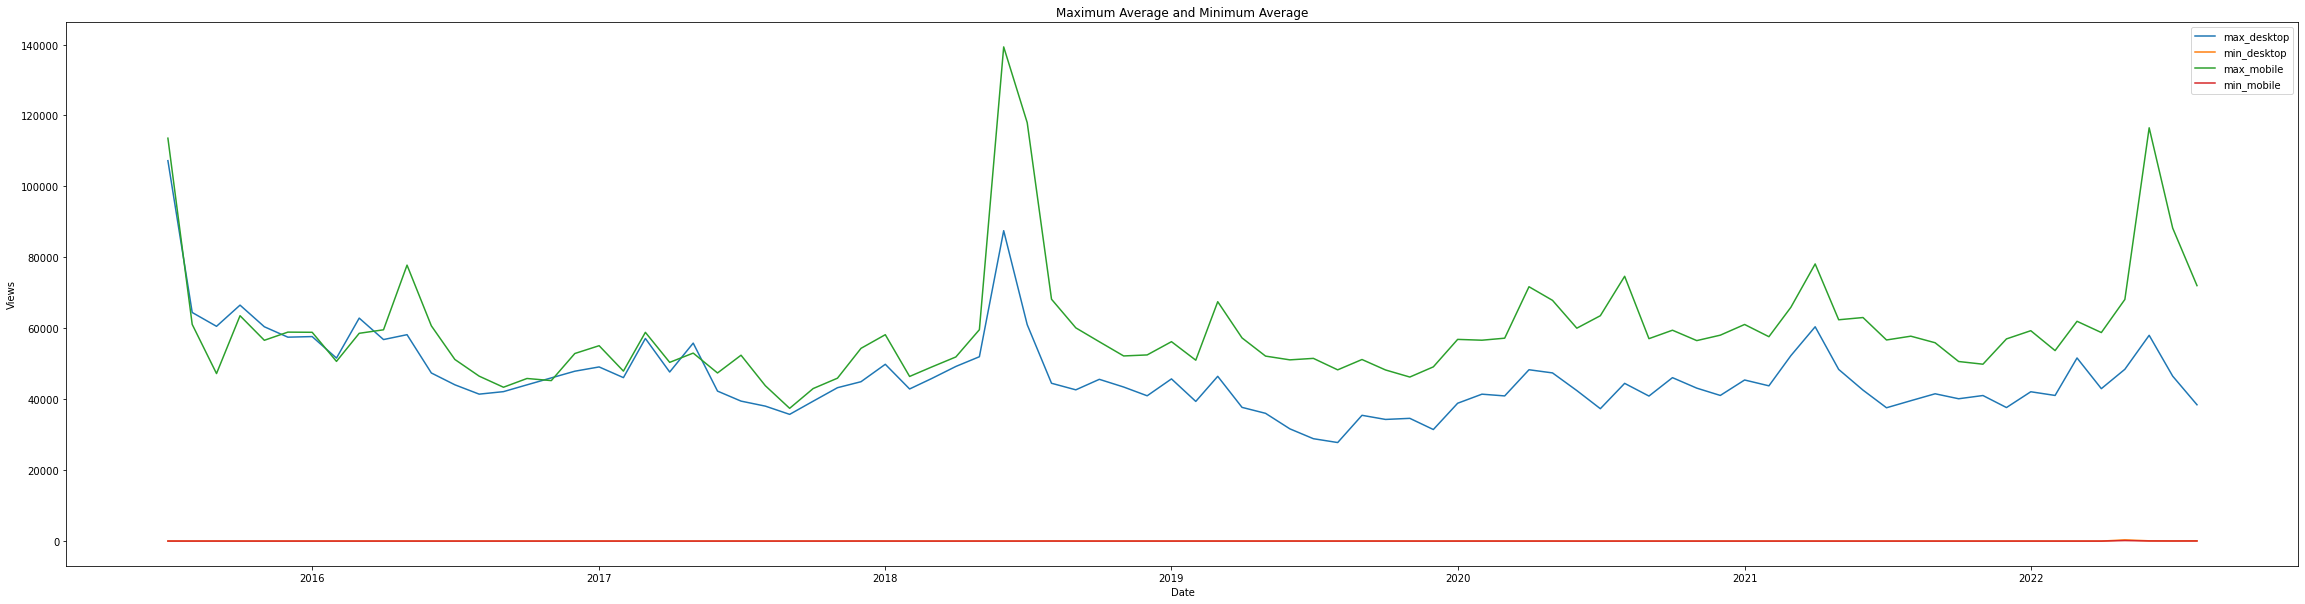

In [83]:
# Drawing line graphs
fig, ax = plt.subplots(figsize=(40, 10))
x = max_desktop['timestamp']
plt.plot(x,max_desktop['views'],label = "max_desktop")
plt.plot(x,min_desktop['views'],label = "min_desktop")
plt.plot(x,max_mobile['views'],label = "max_mobile")
plt.plot(x,min_mobile['views'],label = "min_mobile")
plt.title('Maximum Average and Minimum Average')
plt.xlabel("Date")
plt.ylabel("Views")
plt.legend()

plt.savefig("max_min_avg.png")
plt.show()



### 2.2 Top 10 Peak Page Views 

The second graph should contain time series for the top 10 article pages by largest (peak) page views over the entire time by access type. You first find the month for each article that contains the highest (peak) page views, and then order the articles by these peak values. Your graph should contain the top 10 for desktop and top 10 for mobile access (20 lines).

The following helper function is to find the top 10 dinosaurs that have maximum views for desktop and mobile user type.

In [24]:
def find_top_10(df):
    temp = df.groupby(['article'])['views'].max().sort_values(ascending = False)[:10].reset_index()
    return temp['article']


In [25]:
desktop_dino = find_top_10(desktop_df)
mobile_dino = find_top_10(mobile_combine_df)

desktop_top_10 = desktop_df[desktop_df['article'].isin(desktop_dino)]
desktop_top_10['timestamp'] = pd.to_datetime(desktop_top_10['timestamp'],
                                        format = '%Y%m%d%H')
mobile_top_10 = mobile_combine_df[mobile_combine_df['article'].isin(mobile_dino)]
mobile_top_10['timestamp'] = pd.to_datetime(mobile_top_10['timestamp'],
                                        format = '%Y%m%d%H')

/var/folders/zd/c28nct6s5454q__hl8mn2xbc0000gn/T/ipykernel_12753/1990208477.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desktop_top_10['timestamp'] = pd.to_datetime(desktop_top_10['timestamp'],
/var/folders/zd/c28nct6s5454q__hl8mn2xbc0000gn/T/ipykernel_12753/1990208477.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobile_top_10['timestamp'] = pd.to_datetime(mobile_top_10['timestamp'],


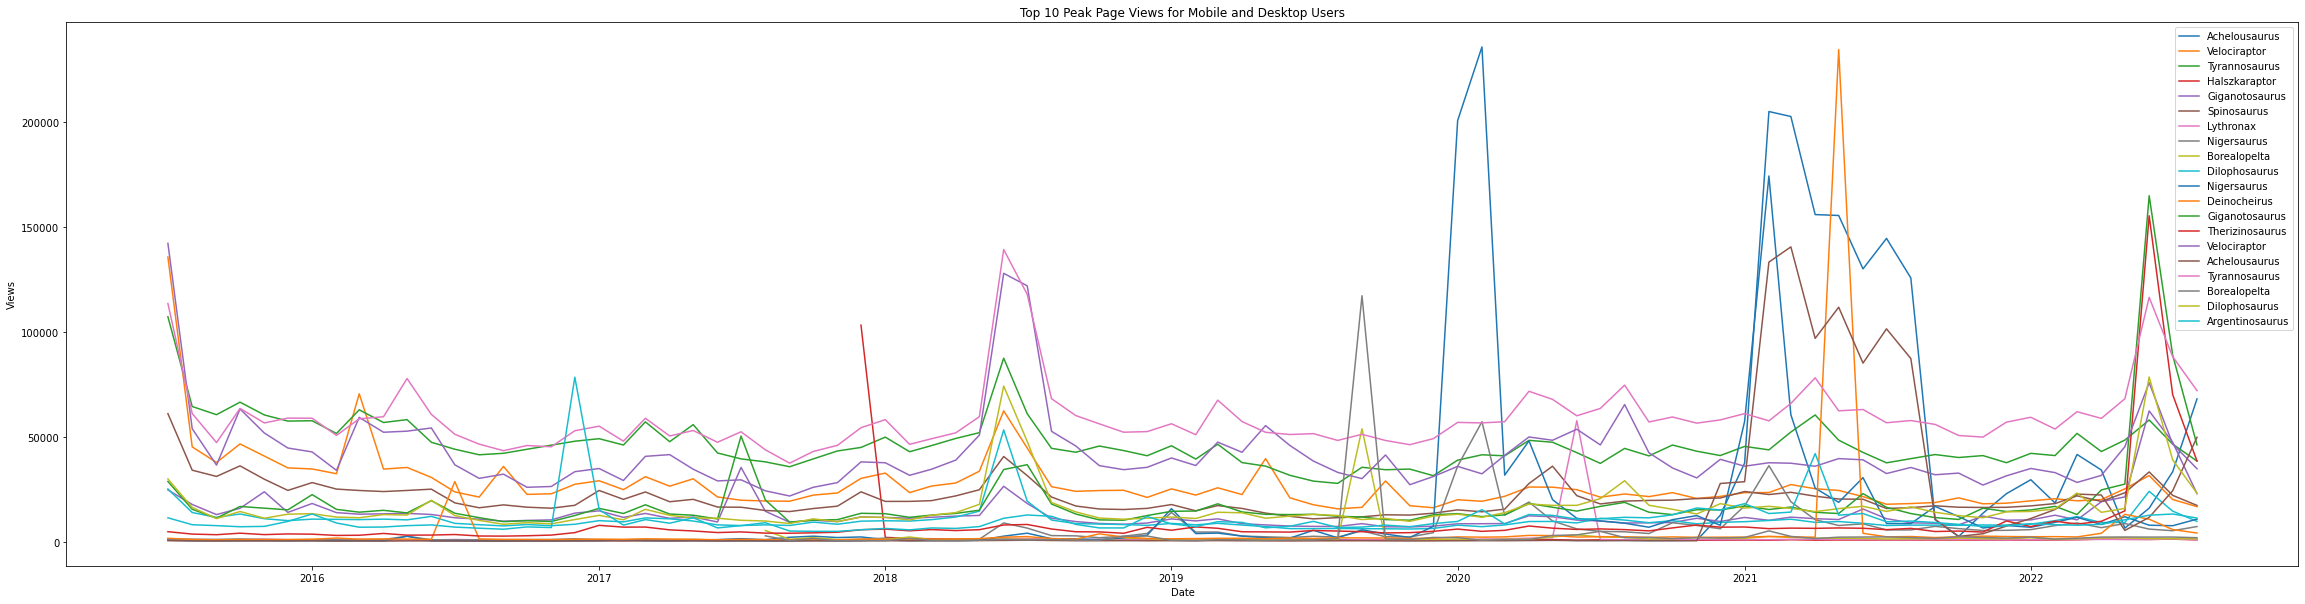

In [77]:

# Drawing line graphs
fig, ax = plt.subplots(figsize=(40, 10))
for i in desktop_dino:
    subset = desktop_top_10[desktop_top_10['article'] == i]
    plt.plot(subset['timestamp'],subset['views'],label = i)

for i in mobile_dino:
    subset = mobile_top_10[mobile_top_10['article'] == i]
    plt.plot(subset['timestamp'],subset['views'],label = i)

plt.title('Top 10 Peak Page Views for Mobile and Desktop Users')
plt.xlabel("Date")
plt.ylabel("Views")
plt.legend()
plt.savefig("top_10_peak.png")

plt.show()



### 2.3 Fewest Months of Data
The third graph should show pages that have the fewest months of available data. These will all be relatively short time series, some may only have one month of data. Your graph should show the 10 articles with the fewest months of data for desktop access and the 10 articles with the fewest months of data for mobile access.

We use similar method of using groupby to find the fewest views

In [40]:
desktop_bottom_10 = desktop_df.groupby(['article'])['views'].agg('count').sort_values(ascending = True).head(10)
desktop_bottom_10


article
Bisticeratops            1
Perijasaurus             1
Mbiresaurus              1
Jakapil                  1
Iyuku                    2
Paralitherizinosaurus    4
Bashanosaurus            6
Dzharaonyx               6
Maip                     7
Kelumapusaura            7
Name: views, dtype: int64

In [41]:
mobile_bottom_10 = mobile_combine_df.groupby(['article'])['views'].agg('count').sort_values(ascending = True).head(10)
mobile_bottom_10

article
Bisticeratops            1
Perijasaurus             1
Mbiresaurus              1
Jakapil                  1
Iyuku                    2
Paralitherizinosaurus    4
Bashanosaurus            6
Dzharaonyx               6
Maip                     7
Kelumapusaura            7
Name: views, dtype: int64

We can see that both desktop and mobile have the result. Now we will extract the time series for these dinosaurs.

In [45]:
desktop_fewest = desktop_df[desktop_df['article'].isin(desktop_bottom_10.index)]
desktop_fewest['timestamp'] = pd.to_datetime(desktop_fewest['timestamp'],
                                        format = '%Y%m%d%H')


/var/folders/zd/c28nct6s5454q__hl8mn2xbc0000gn/T/ipykernel_12753/1127538205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desktop_fewest['timestamp'] = pd.to_datetime(desktop_fewest['timestamp'],


In [52]:
mobile_fewest = mobile_combine_df[mobile_combine_df['article'].isin(mobile_bottom_10.index)]
mobile_fewest['timestamp'] = pd.to_datetime(mobile_fewest['timestamp'],
                                        format = '%Y%m%d%H')
mobile_fewest = mobile_fewest.assign(access = 'mobile')

/var/folders/zd/c28nct6s5454q__hl8mn2xbc0000gn/T/ipykernel_12753/1753398466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobile_fewest['timestamp'] = pd.to_datetime(mobile_fewest['timestamp'],


We now combine both the mobile and desktop dataframe in the following code.

In [80]:
fewest_all = pd.concat([mobile_fewest,desktop_fewest]).reset_index()
fewest_all = fewest_all[['article','timestamp','views','access']]

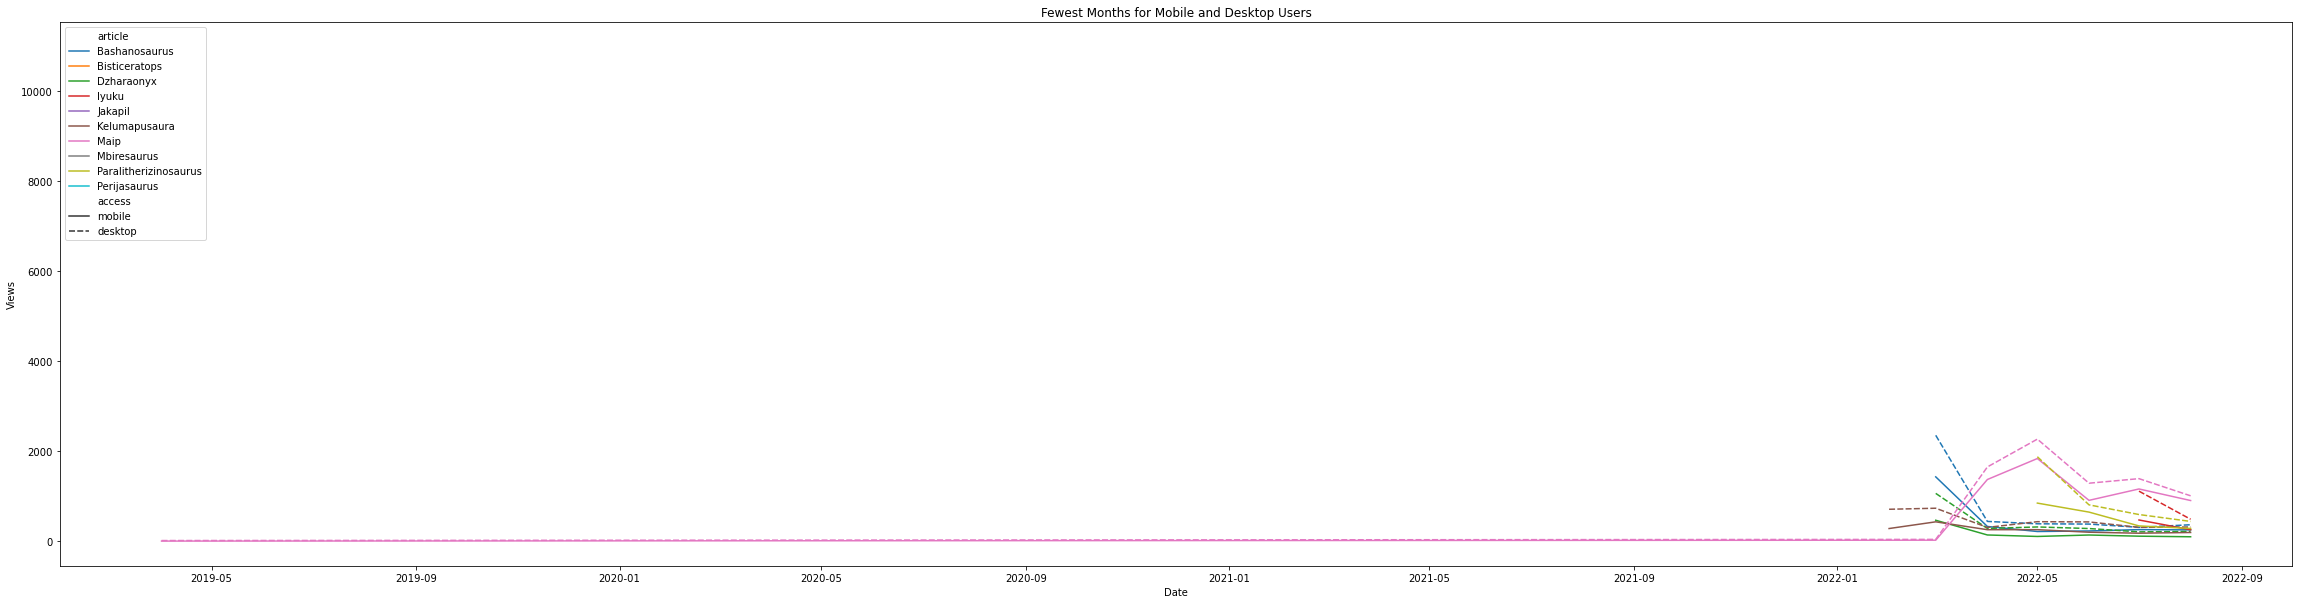

In [81]:
fig, ax = plt.subplots(figsize=(40, 10))
lp = sns.lineplot(data = fewest_all,
            x = 'timestamp',
            y = 'views',
            hue = 'article',
            style = 'access'
             )

plt.title('Fewest Months for Mobile and Desktop Users')
plt.xlabel("Date")
plt.ylabel("Views")
plt.legend()
plt.savefig("fewest_month.png")


Given the odd shape of the chart, we further invetigate on the article 'Maip'.

In [82]:
fewest_all[fewest_all['article'] == 'Maip']

,article,timestamp,views,access
23,Maip,2019-04-01,1,mobile
24,Maip,2022-03-01,21,mobile
25,Maip,2022-04-01,1369,mobile
26,Maip,2022-05-01,1835,mobile
27,Maip,2022-06-01,906,mobile
28,Maip,2022-07-01,1159,mobile
29,Maip,2022-08-01,902,mobile
59,Maip,2019-04-01,13,desktop
60,Maip,2022-03-01,39,desktop
61,Maip,2022-04-01,1648,desktop


It can be seen that there are missing data for 'Maip', which explains the flat line from 2019 to 2022.